In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input,Dense,LSTM,Bidirectional,Concatenate
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model

In [2]:
(x_train,y_train1),(x_test,y_test1)=mnist.load_data()
x_train=x_train.reshape(60000,28,28).astype('float32')/255
x_test=x_test.reshape(10000,28,28).astype('float32')/255

y_train=to_categorical(y_train1)
y_test=to_categorical(y_test1)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
inputs=Input(shape=(28,28))

forward_lstm=LSTM(128,return_sequences=False)(inputs)
backward_lstm=LSTM(128,return_sequences=False,go_backwards=True)(inputs)
rnn_layer=Concatenate()([forward_lstm,backward_lstm])

outputs=Dense(10,activation='softmax')(rnn_layer)
model=Model(inputs,outputs)

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history=model.fit(x_train,y_train,validation_split=0.1,epochs=5,batch_size=64)

Epoch 1/5
844/844 [==============================] - 21s 14ms/step - loss: 0.3799 - accuracy: 0.8746 - val_loss: 0.1379 - val_accuracy: 0.9563
Epoch 2/5
844/844 [==============================] - 8s 10ms/step - loss: 0.1170 - accuracy: 0.9630 - val_loss: 0.0866 - val_accuracy: 0.9765
Epoch 3/5
844/844 [==============================] - 8s 9ms/step - loss: 0.0849 - accuracy: 0.9735 - val_loss: 0.0689 - val_accuracy: 0.9813
Epoch 4/5
844/844 [==============================] - 7s 8ms/step - loss: 0.0639 - accuracy: 0.9800 - val_loss: 0.0589 - val_accuracy: 0.9835
Epoch 5/5
844/844 [==============================] - 7s 8ms/step - loss: 0.0519 - accuracy: 0.9838 - val_loss: 0.0693 - val_accuracy: 0.9788


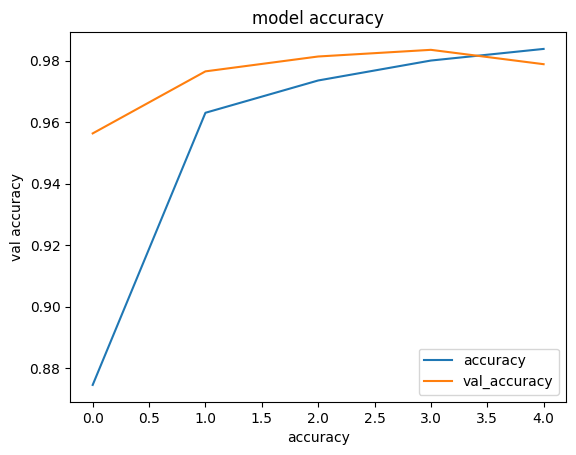

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('val accuracy')
plt.legend(['accuracy','val_accuracy'],loc='lower right')
plt.show()

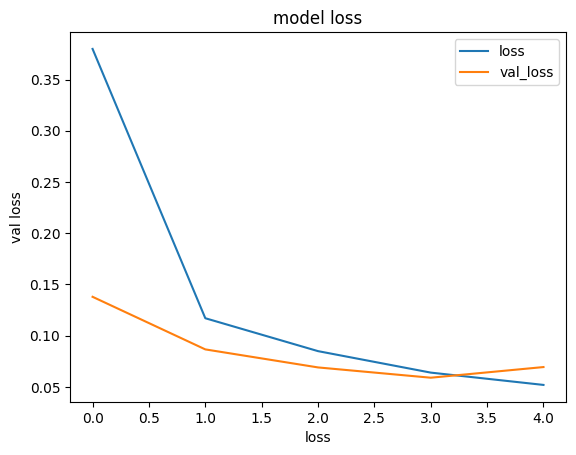

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('val loss')
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()

In [8]:
y_pred=model.predict(x_test)

313/313 [==============================] - 2s 3ms/step


In [9]:
y_test1

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred)

0.9785